<a href="https://colab.research.google.com/github/Us9r/vault/blob/main/UAS_Big_Data/proper_sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('translated_comments_real.csv')
df.head()

,Username,Comment,Translated_Comment
0,@AdriantDrian,Bus Bus Lintas Sumatera Jawa Kalimantan layak ...,Cross -Bus Sumatra Bus Jawa Kalimantan is suit...
1,@saddestboy2966,rekomendasi power bank starlink dong,Starlink Power Bank Recommendations
2,@Dion-ry8td,lanjut bang,Bang
3,@tomotomo4066,Saya pengin beli mau jual lagi. Kalau ngga ngg...,"I want to buy to sell again.If not, you don't ..."
4,@nicocs3316,"Wahh,,, bagus nih tinggal pelosok, pegunungan ...","Wahh ... it's good to stay remote, mountains t..."


In [5]:
import re
import numpy as np

def remove_mentions(text):
  if isinstance(text, str):
    if re.search(r'\s?@\w+', text): # Mencocokkan @ dengan atau tanpa spasi di awal
      print(f"Teks sebelum diproses: {text}")
      text_cleaned = re.sub(r'\s?@\w+\s*', '', text) # Menghapus mention & spasi sebelum/sesudah
      text_cleaned = re.sub(r'@', '', text)
      text_cleaned = text_cleaned.strip()
      print(f"Teks setelah diproses: {text_cleaned}\n")

      if text_cleaned == '':
        return np.nan
      else:
        return text_cleaned
    else:
      return text
  else:
    return text

df['Comment'] = df['Comment'].apply(remove_mentions)
df['Translated_Comment'] = df['Translated_Comment'].apply(remove_mentions)

df.dropna(subset=['Comment', 'Translated_Comment'], inplace=True)

In [7]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.1 MB/s eta 0:00:00


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df.dropna(subset=['Comment', 'Translated_Comment'], inplace=True)

analyzer = SentimentIntensityAnalyzer()

df_vader = pd.DataFrame()
df_vader['Translated_Comment'] = df['Translated_Comment']

df_vader['scores'] = df_vader['Translated_Comment'].apply(lambda Translated_Comment: analyzer.polarity_scores(Translated_Comment))

df_vader['compound']  = df_vader['scores'].apply(lambda score_dict: score_dict['compound'])
df_vader['neg']  = df_vader['scores'].apply(lambda score_dict: score_dict['neg'])
df_vader['neu']  = df_vader['scores'].apply(lambda score_dict: score_dict['neu'])
df_vader['pos']  = df_vader['scores'].apply(lambda score_dict: score_dict['pos'])

sentiment
neutral     4731
positive    4252
negative    1606
Name: count, dtype: int64
sentiment
neutral     44.678440
positive    40.154878
negative    15.166682
Name: count, dtype: float64


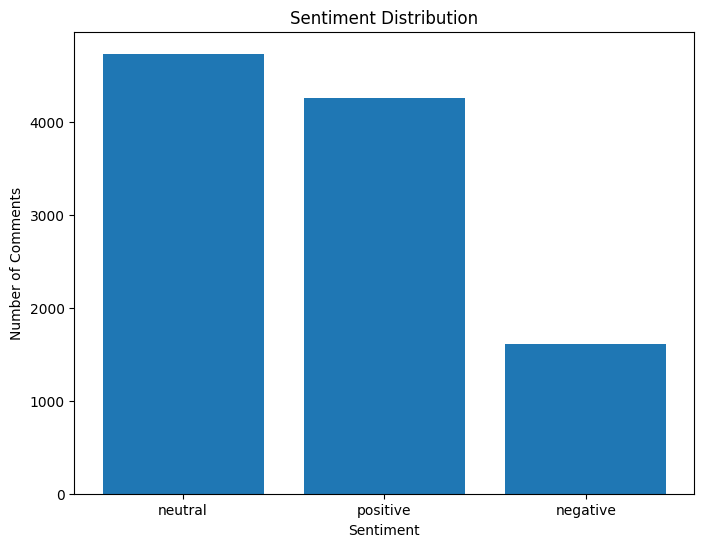

In [9]:
# prompt: lakukan analisis terhadap hasil sentimen

# Categorize sentiment based on compound score
df_vader['sentiment'] = df_vader['compound'].apply(lambda c: 'positive' if c >= 0.05 else ('neutral' if c > -0.05 and c < 0.05 else 'negative'))

# Analyze the distribution of sentiments
sentiment_counts = df_vader['sentiment'].value_counts()
print(sentiment_counts)

# Calculate the percentage of each sentiment
sentiment_percentages = sentiment_counts / len(df_vader) * 100
print(sentiment_percentages)

# You can further analyze the data by:
# 1. Visualizing the distribution of sentiments (e.g., bar chart)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# 2. Analyzing the average sentiment scores for different groups or categories
# (if your dataset has additional columns that could be used for grouping).
# For Example:
# if 'category' column exists in the dataframe
# sentiment_by_category = df_vader.groupby('category')['compound'].mean()
# print(sentiment_by_category)

# 3. Examining the most positive and negative comments to gain qualitative insights
# print("Most positive comments:")
# print(df_vader.sort_values(by='compound', ascending=False).head(5)['Translated_Comment'])
#
# print("\nMost negative comments:")
# print(df_vader.sort_values(by='compound', ascending=True).head(5)['Translated_Comment'])



In [11]:
from textblob import TextBlob

df_textblob = pd.DataFrame()
df_textblob['Translated_Comment'] = df['Translated_Comment']

df_textblob['polarity'] = df_textblob['Translated_Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_textblob['subjectivity'] = df_textblob['Translated_Comment'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

#Categorize sentiment based on polarity score
df_textblob['sentiment'] = df_textblob['polarity'].apply(lambda c: 'positive' if c >= 0.05 else ('neutral' if c > -0.05 and c < 0.05 else 'negative'))

In [13]:
df_textblob.head()

,Translated_Comment,polarity,subjectivity,sentiment
0,Cross -Bus Sumatra Bus Jawa Kalimantan is suit...,0.166667,0.383333,positive
1,Starlink Power Bank Recommendations,0.000000,0.000000,neutral
2,Bang,0.000000,0.000000,neutral
3,"I want to buy to sell again.If not, you don't ...",0.000000,0.000000,neutral
4,"Wahh ... it's good to stay remote, mountains t...",0.233333,0.600000,positive


sentiment
neutral     5696
positive    3632
negative    1261
Name: count, dtype: int64
sentiment
neutral     53.791671
positive    34.299745
negative    11.908584
Name: count, dtype: float64


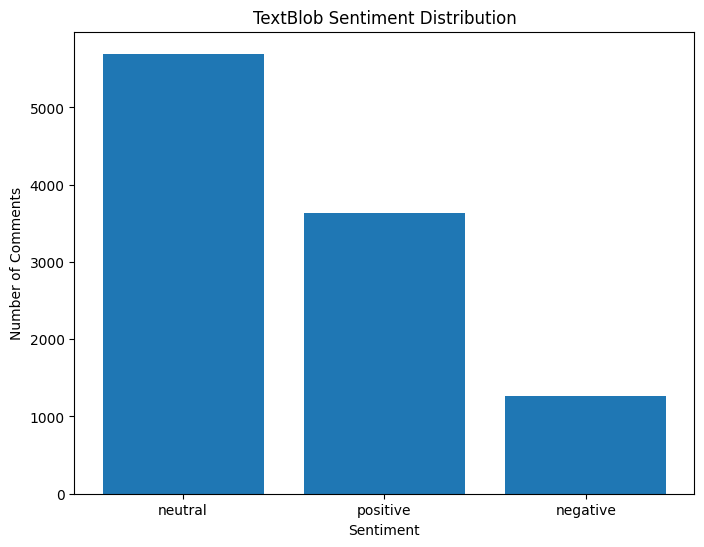

Most positive comments:
6719                             Delicious download mp3😂😂
1781    I am 100Mbps 700 thousand per month.Just add 5...
5804                 Horrified "delicious if he is stolen
353                                              Best !!!
4607                Excellent …\nIndiHome prices dropped😂
Name: Translated_Comment, dtype: object

Most negative comments:
10118                            BYU PROVIDER is the worst
1200                                 The month is terrible
2931     This is dangerous ... State sovereignty is thr...
5600                   Boring Company JG Visions  Babamcat
4575                    Telkomsel's bleak starts from here
Name: Translated_Comment, dtype: object


In [14]:
# prompt: lakukan analisis terhadap hasil sentimen textblob

# Analyze the distribution of sentiments
sentiment_counts_textblob = df_textblob['sentiment'].value_counts()
print(sentiment_counts_textblob)

# Calculate the percentage of each sentiment
sentiment_percentages_textblob = sentiment_counts_textblob / len(df_textblob) * 100
print(sentiment_percentages_textblob)

# Visualize the distribution of sentiments (e.g., bar chart)
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts_textblob.index, sentiment_counts_textblob.values)
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

#Analyze the most positive and negative comments
print("Most positive comments:")
print(df_textblob.sort_values(by='polarity', ascending=False).head(5)['Translated_Comment'])

print("\nMost negative comments:")
print(df_textblob.sort_values(by='polarity', ascending=True).head(5)['Translated_Comment'])